In [1]:
import numpy as np
from nilearn import image
import nibabel as nib
from nibabel.freesurfer.mghformat import load
import os
import pandas as pd

/home/jacob/.local/lib/python3.6/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.6 support is deprecated and will be removed in release 0.10 of Nilearn. Consider switching to Python 3.8 or 3.9.
  _python_deprecation_warnings()


In [2]:
# https://gist.github.com/JDWarner/6730747

def dice(im1, im2):

    im1 = np.asarray(im1).astype(np.bool)
    im2 = np.asarray(im2).astype(np.bool)

    if im1.shape != im2.shape:
        raise ValueError("Shape mismatch: im1 and im2 must have the same shape.")

    # Compute Dice coefficient
    intersection = np.logical_and(im1, im2)

    return 2. * intersection.sum() / (im1.sum() + im2.sum())

In [3]:
directory = '/home/jacob/Desktop/Dice_Ducky/FSL_all' #FSL
directory2 = '/home/jacob/Desktop/Dice_Ducky/nativeSegs' #FreeSurfer converted to native space
dice_list = []
dice_dict = {}
counter = 0

for img_FSL in os.listdir(directory):

    filename_FSL = img_FSL
    print(filename_FSL)
    print(counter)
    counter += 1
    img_FSL = os.path.join(directory, img_FSL)
    
    try:
        test_FSL = nib.load(img_FSL)
        data_FSL = test_FSL.get_fdata()
        data_FSL[data_FSL != 17.0] = 0.0
        #print("FSL shape: " + str(data_FSL.shape))

        filename_FreeSurfer = filename_FSL[:-7] + "_aseg-in-rawavg.mgz"
        #print(filename_FreeSurfer)
        img_FreeSurfer = os.path.join(directory2, filename_FreeSurfer) 
        test_FreeSurfer = load(img_FreeSurfer)
        data_FreeSurfer = test_FreeSurfer.get_fdata()
        data_FreeSurfer[data_FreeSurfer != 17.0] = 0.0
        #print("FreeSurfer shape: " + str(data_FreeSurfer.shape))

        dice_score = dice(data_FreeSurfer,data_FSL)
        dice_list.append(dice_score)
        print("Dice: " + str(dice_score))
        entry_dict = {'FSL-FreeSurfer': dice_score}
        dice_dict[filename_FSL] = entry_dict
        print(" ")
    except Exception as e:
        print(img_FreeSurfer + " Some damn error")

sub-6852929_ses-NAPFU24_run-002_T1w.nii.gz
0
Dice: 0.0
 
sub-9931234_ses-NAPBL00_run-001_T1w.nii.gz
1
Dice: 0.8230395558639834
 
sub-9939055_ses-NAPFU12_run-001_T1w.nii.gz
2
Dice: 0.8317954126021618
 
sub-9023102_ses-NAPFU48_run-002_T1w.nii.gz
3
Dice: 0.0
 
sub-9249727_ses-NAPFU24_run-001_T1w.nii.gz
4
Dice: 0.771155468091088
 
sub-2663318_ses-NAPFU24_run-002_T1w.nii.gz
5
Dice: 0.8476968796433878
 
sub-9023102_ses-NAPEN00_run-002_T1w.nii.gz
6
Dice: 0.8619967419129625
 
sub-4541749_ses-NAPFU48_run-001_T1w.nii.gz
7
Dice: 0.8515723270440252
 
sub-4317780_ses-PREFU24_run-001_T1w.nii.gz
8
Dice: 0.19406631762652704
 
sub-3169275_ses-PREFU12_run-001_T1w.nii.gz
9
Dice: 0.0
 
sub-7492583_ses-NAPFU03_run-001_T1w.nii.gz
10
Dice: 0.8437853107344633
 
sub-6350639_ses-NAPFU48_run-002_T1w.nii.gz
11
Dice: 0.0
 
sub-2623146_ses-PREBL00_run-001_T1w.nii.gz
12
Dice: 0.0
 
sub-3195342_ses-NAPFU48_run-001_T1w.nii.gz
13
Dice: 0.0
 
sub-4091474_ses-PREEN00_run-001_T1w.nii.gz
14
Dice: 0.8529490258873765
 
sub-6

Dice: 0.026239067055393587
 
sub-2823276_ses-PREFU48_run-002_T1w.nii.gz
123
Dice: 0.8679091280097946
 
sub-2111048_ses-NAPEN00_run-001_T1w.nii.gz
124
Dice: 0.8237579794615598
 
sub-9555827_ses-NAPFU36_run-001_T1w.nii.gz
125
Dice: 0.8330381988363268
 
sub-3230637_ses-NAPEN00_run-001_T1w.nii.gz
126
Dice: 0.8682522715125601
 
sub-6187101_ses-NAPEN00_run-001_T1w.nii.gz
127
Dice: 0.8326437437580254
 
sub-6445003_ses-NAPFU12_run-001_T1w.nii.gz
128
Dice: 0.843667352336174
 
sub-7863306_ses-PREBL00_run-001_UNIT1.nii.gz
129
Dice: 0.8638676844783715
 
sub-4532706_ses-PREFU24_run-002_T1w.nii.gz
130
Dice: 0.0
 
sub-9843864_ses-PREBL00_run-001_T1w.nii.gz
131
Dice: 0.8427754677754677
 
sub-9042627_ses-PREBL00_run-001_T1w.nii.gz
132
Dice: 0.8464190981432361
 
sub-5730499_ses-PREFU12_run-001_T1w.nii.gz
133
Dice: 0.815336013785181
 
sub-9605091_ses-PREFU12_run-001_T1w.nii.gz
134
Dice: 0.0
 
sub-8019820_ses-PREEN00_run-001_T1w.nii.gz
135
Dice: 0.8861538461538462
 
sub-3705605_ses-PREFU36_run-001_T1w.nii

Dice: 0.6947665308680664
 
sub-4943065_ses-PREFU24_run-001_T1w.nii.gz
239
Dice: 0.8275003888629647
 
sub-9555827_ses-NAPFU03_run-001_T1w.nii.gz
240
Dice: 0.0
 
sub-1404211_ses-NAPFU24_run-002_T1w.nii.gz
241
Dice: 0.8539402950932174
 
sub-3360165_ses-NAPBL00_run-001_T1w.nii.gz
242
Dice: 0.0
 
sub-5452448_ses-NAPEN00_run-001_T1w.nii.gz
243
Dice: 0.8538226299694189
 
sub-5985051_ses-NAPBL00_run-001_T1w.nii.gz
244
Dice: 0.0
 
sub-4052945_ses-PREBL00_run-001_T1w.nii.gz
245
Dice: 0.8364177131526768
 
sub-2424540_ses-NAPBL00_run-001_T1w.nii.gz
246
Dice: 0.8422161999397771
 
sub-7243782_ses-NAPFU12_run-001_T1w.nii.gz
247
Dice: 0.8537265842965325
 
sub-2496306_ses-PREBL00_run-001_T1w.nii.gz
248
Dice: 0.8524188609920392
 
sub-7819541_ses-PREBL00_run-001_UNIT1.nii.gz
249
Dice: 0.7841328413284133
 
sub-5360989_ses-PREEN00_run-001_T1w.nii.gz
250
Dice: 0.691713048855906
 
sub-1966913_ses-NAPFU03_run-001_T1w.nii.gz
251
Dice: 0.7589483687044662
 
sub-3692881_ses-PREFU24_run-001_T1w.nii.gz
252
Dice: 0.

Dice: 0.8534749889331562
 
sub-1635604_ses-PREFU48_run-002_T1w.nii.gz
357
Dice: 0.8564509619265438
 
sub-9488568_ses-NAPFU48_run-001_T1w.nii.gz
358
Dice: 0.8496568933250156
 
sub-9909448_ses-PREFU48_run-002_T1w.nii.gz
359
Dice: 0.0
 
sub-4280226_ses-PREBL00_run-001_T1w.nii.gz
360
Dice: 0.8536458333333333
 
sub-9769696_ses-NAPFU36_run-001_T1w.nii.gz
361
Dice: 0.7546922168263551
 
sub-6433158_ses-PREFU12_run-001_T1w.nii.gz
362
Dice: 0.820040899795501
 
sub-4541749_ses-NAPFU36_run-001_T1w.nii.gz
363
Dice: 0.8259033317691225
 
sub-3697357_ses-NAPFU03_run-001_T1w.nii.gz
364
Dice: 0.003303684879288437
 
sub-4052945_ses-PREFU48_run-001_T1w.nii.gz
365
Dice: 0.0
 
sub-9327302_ses-NAPFU03_run-001_T1w.nii.gz
366
Dice: 0.0
 
sub-7492583_ses-NAPEN00_run-001_T1w.nii.gz
367
Dice: 0.8383368569415081
 
sub-1016072_ses-PREFU12_run-001_T1w.nii.gz
368
Dice: 0.8481963927855711
 
sub-8120729_ses-PREFU48_run-001_T1w.nii.gz
369
Dice: 0.0
 
sub-9053120_ses-PREBL00_run-001_UNIT1.nii.gz
370
Dice: 0.8464357489064

Dice: 0.0
 
sub-3692881_ses-PREEN00_run-001_T1w.nii.gz
478
Dice: 0.0
 
sub-3165520_ses-PREFU48_run-001_T1w.nii.gz
479
Dice: 0.0
 
sub-9249727_ses-NAPEN00_run-001_T1w.nii.gz
480
Dice: 0.6071068910948065
 
sub-3301724_ses-PREFU36_run-001_T1w.nii.gz
481
Dice: 0.8629088378566457
 
sub-3048898_ses-PREFU24_run-001_T1w.nii.gz
482
Dice: 0.8263423965022544
 
sub-7945015_ses-NAPFU48_run-002_T1w.nii.gz
483
Dice: 0.8171859785783836
 
sub-1438245_ses-NAPEN00_run-001_T1w.nii.gz
484
Dice: 0.0
 
sub-3697357_ses-NAPEN00_run-001_T1w.nii.gz
485
Dice: 0.0
 
sub-3475739_ses-PREBL00_run-001_T1w.nii.gz
486
Dice: 0.0
 
sub-9191774_ses-NAPFU24_run-001_T1w.nii.gz
487
Dice: 0.0
 
sub-1177880_ses-PREFU24_run-001_T1w.nii.gz
488
Dice: 0.851972708395135
 
sub-4317780_ses-PREEN00_run-001_T1w.nii.gz
489
Dice: 0.0
 
sub-5774407_ses-NAPBL00_run-001_T1w.nii.gz
490
Dice: 0.0
 
sub-8916796_ses-NAPEN00_run-001_T1w.nii.gz
491
Dice: 0.0
 
sub-4280226_ses-PREBL00_run-001_UNIT1.nii.gz
492
Dice: 0.8384125694162264
 
sub-9939055_

Dice: 0.8538288554858563
 
sub-9939055_ses-NAPBL00_run-001_T1w.nii.gz
596
Dice: 0.0
 
sub-4498598_ses-NAPFU48_run-002_T1w.nii.gz
597
Dice: 0.7895304910955208
 
sub-6360867_ses-NAPEN00_run-001_T1w.nii.gz
598
Dice: 0.8540992448759439
 
sub-1016072_ses-PREFU24_run-002_T1w.nii.gz
599
Dice: 0.0
 
sub-1369125_ses-PREEN00_run-001_T1w.nii.gz
600
Dice: 0.8306354191833776
 
sub-1626987_ses-NAPFU12_run-001_T1w.nii.gz
601
Dice: 0.8076466397530278
 
sub-9889544_ses-PREFU12_run-001_T1w.nii.gz
602
Dice: 0.0
 
sub-4052945_ses-PREFU48_run-002_T1w.nii.gz
603
Dice: 0.0
 
sub-4696223_ses-NAPBL00_run-001_T1w.nii.gz
604
Dice: 0.8161668839634941
 
sub-4360628_ses-NAPFU24_run-002_T1w.nii.gz
605
Dice: 0.8547676029726666
 
sub-6605596_ses-NAPFU03_run-001_T1w.nii.gz
606
Dice: 0.0
 
sub-6781586_ses-PREEN00_run-001_T1w.nii.gz
607
Dice: 0.8442065673369015
 
sub-4538817_ses-NAPEN00_run-001_T1w.nii.gz
608
Dice: 0.8666118227758843
 
sub-5985051_ses-NAPFU24_run-002_T1w.nii.gz
609
Dice: 0.0
 
sub-4532706_ses-PREBL00_run

Dice: 0.0
 
sub-2161762_ses-NAPFU12_run-001_T1w.nii.gz
709
Dice: 0.8831454495463293
 
sub-6852929_ses-NAPFU24_run-001_T1w.nii.gz
710
Dice: 0.0
 
sub-3360165_ses-NAPFU12_run-001_T1w.nii.gz
711
Dice: 0.0
 
sub-9690995_ses-NAPFU24_run-001_T1w.nii.gz
712
Dice: 0.0
 
sub-6360867_ses-NAPFU12_run-001_T1w.nii.gz
713
Dice: 0.0
 
sub-7237992_ses-PREFU36_run-001_T1w.nii.gz
714
Dice: 0.0
 
sub-4498598_ses-NAPFU36_run-001_T1w.nii.gz
715
Dice: 0.8683853459972863
 
sub-2496306_ses-PREFU12_run-001_T1w.nii.gz
716
Dice: 0.859192607003891
 
sub-4360628_ses-NAPFU03_run-001_T1w.nii.gz
717
Dice: 0.8378512807759264
 
sub-9026274_ses-NAPBL00_run-001_T1w.nii.gz
718
Dice: 0.0
 
sub-8822042_ses-NAPBL00_run-001_T1w.nii.gz
719
Dice: 0.0
 
sub-2111048_ses-NAPFU12_run-001_T1w.nii.gz
720
Dice: 0.8319706794474203
 
sub-7760229_ses-PREBL00_run-001_T1w.nii.gz
721
Dice: 0.84931157572667
 
sub-4806541_ses-NAPFU24_run-001_T1w.nii.gz
722
Dice: 0.0
 
sub-9690995_ses-NAPFU24_run-002_T1w.nii.gz
723
Dice: 0.11647727272727272
 


Dice: 0.8068524550609241
 
sub-7568597_ses-PREBL00_run-001_T1w.nii.gz
827
Dice: 0.8340356123419872
 
sub-6519252_ses-NAPBL00_run-001_T1w.nii.gz
828
Dice: 0.8510522000546598
 
sub-3048898_ses-PREFU36_run-001_T1w.nii.gz
829
Dice: 0.828794306829068
 
sub-7658604_ses-NAPFU24_run-001_T1w.nii.gz
830
Dice: 0.0
 
sub-1984879_ses-PREBL00_run-001_T1w.nii.gz
831
Dice: 0.8585090730750368
 
sub-6404099_ses-PREFU12_run-001_T1w.nii.gz
832
Dice: 0.8341109383100052
 
sub-7243782_ses-NAPFU36_run-001_T1w.nii.gz
833
Dice: 0.8567578493464493
 
sub-9155520_ses-NAPBL00_run-001_T1w.nii.gz
834
Dice: 0.8345624385447394
 
sub-7863306_ses-PREBL00_run-001_T1map.nii.gz
835
/home/jacob/Desktop/Dice_Ducky/nativeSegs/sub-7863306_ses-PREBL00_run-001_T1map_aseg-in-rawavg.mgz Some damn error
sub-4628515_ses-NAPFU24_run-001_T1w.nii.gz
836
Dice: 0.7367862824818808
 
sub-1076159_ses-NAPBL00_run-001_T1w.nii.gz
837
Dice: 0.8274538745387454
 
sub-5707288_ses-PREBL00_run-001_UNIT1.nii.gz
838
Dice: 0.8667170571932477
 
sub-30488

Dice: 0.8132140399174123
 
sub-9827494_ses-PREBL00_run-001_T1w.nii.gz
943
Dice: 0.8475097929490767
 
sub-1176949_ses-PREBL00_run-001_T1w.nii.gz
944
Dice: 0.8436323057609151
 
sub-6433158_ses-PREEN00_run-001_T1w.nii.gz
945
Dice: 0.8484389208851167
 
sub-1263509_ses-PREEN00_run-001_T1w.nii.gz
946
Dice: 0.8520917678812415
 
sub-3756689_ses-NAPEN00_run-001_T1w.nii.gz
947
Dice: 0.8558629185799081
 
sub-6350639_ses-NAPFU36_run-001_T1w.nii.gz
948
Dice: 0.7669693039342845
 
sub-9690995_ses-NAPFU03_run-001_T1w.nii.gz
949
Dice: 0.7806433721575152
 
sub-6788676_ses-PREBL00_run-001_T1w.nii.gz
950
Dice: 0.02244718309859155
 
sub-5984591_ses-NAPFU12_run-001_T1w.nii.gz
951
Dice: 0.0
 
sub-3276299_ses-PREBL00_run-001_T1w.nii.gz
952
Dice: 0.7491438356164384
 
sub-5774407_ses-NAPFU48_run-002_T1w.nii.gz
953
Dice: 0.0
 
sub-3531206_ses-NAPFU12_run-002_T1w.nii.gz
954
Dice: 0.8285520668624351
 
sub-7237992_ses-PREFU12_run-001_T1w.nii.gz
955
Dice: 0.0
 
sub-3360165_ses-NAPFU36_run-001_T1w.nii.gz
956
Dice: 0.

Dice: 0.0
 
sub-1004359_ses-PREFU24_run-001_T1w.nii.gz
1060
Dice: 0.8673508171797796
 
sub-4067832_ses-PREBL00_run-001_T1w.nii.gz
1061
Dice: 0.8323192302249894
 
sub-7178383_ses-NAPEN00_run-001_T1w.nii.gz
1062
Dice: 0.8279854032968416
 
sub-7125565_ses-PREFU12_run-001_T1w.nii.gz
1063
Dice: 0.8598622417031935
 
sub-4437799_ses-NAPFU24_run-001_T1w.nii.gz
1064
Dice: 0.0998706338939198
 
sub-6865719_ses-NAPBL00_run-001_T1w.nii.gz
1065
Dice: 0.8342471530999578
 
sub-6161064_ses-NAPBL00_run-001_T1w.nii.gz
1066
Dice: 0.18115015974440896
 
sub-4943065_ses-PREFU48_run-002_T1w.nii.gz
1067
Dice: 0.8138355111452729
 
sub-4943065_ses-PREEN00_run-001_T1w.nii.gz
1068
Dice: 0.8222842863442599
 
sub-2336041_ses-PREBL00_run-001_T1w.nii.gz
1069
Dice: 0.0
 
sub-7237992_ses-PREFU12_run-002_T1w.nii.gz
1070
Dice: 0.0
 
sub-9249727_ses-NAPFU12_run-001_T1w.nii.gz
1071
Dice: 0.0
 
sub-3047136_ses-NAPFU03_run-001_T1w.nii.gz
1072
Dice: 0.0
 
sub-6350639_ses-NAPBL00_run-001_T1w.nii.gz
1073
Dice: 0.8379263301500682

Dice: 0.8241379310344827
 
sub-4498598_ses-NAPEN00_run-001_T1w.nii.gz
1174
Dice: 0.0
 
sub-9026274_ses-NAPFU36_run-001_T1w.nii.gz
1175
Dice: 0.0
 
sub-9026274_ses-NAPFU24_run-002_T1w.nii.gz
1176
Dice: 0.0
 
sub-3230637_ses-PREFU12_run-001_T1w.nii.gz
1177
Dice: 0.0
 
sub-3165520_ses-PREFU24_run-002_T1w.nii.gz
1178
Dice: 0.0
 
sub-3191214_ses-PREBL00_run-001_T1w.nii.gz
1179
Dice: 0.8216389930369576
 
sub-3230637_ses-NAPBL00_run-001_T1w.nii.gz
1180
Dice: 0.6197086546700943
 
sub-3475739_ses-PREFU24_run-002_T1w.nii.gz
1181
Dice: 0.0
 
sub-3705605_ses-PREFU12_run-001_T1w.nii.gz
1182
Dice: 0.7835321882784844
 
sub-7055352_ses-PREBL00_run-001_T1w.nii.gz
1183
Dice: 0.8325727324586423
 
sub-4052945_ses-PREEN00_run-001_T1w.nii.gz
1184
Dice: 0.7924929178470255
 
sub-1784075_ses-NAPFU24_run-001_T1w.nii.gz
1185
Dice: 0.0
 
sub-3756689_ses-NAPBL00_run-001_T1w.nii.gz
1186
Dice: 0.8602250318988517
 
sub-6187101_ses-PREFU24_run-002_T1w.nii.gz
1187
Dice: 0.0
 
sub-6433158_ses-PREFU24_run-002_T1w.nii.gz


Dice: 0.0
 
sub-5158901_ses-PREFU12_run-001_T1w.nii.gz
1288
Dice: 0.02051129607609988
 
sub-4091474_ses-PREFU12_run-001_T1w.nii.gz
1289
Dice: 0.0
 
sub-2738676_ses-PREFU12_run-001_T1w.nii.gz
1290
Dice: 0.8405524168236033
 
sub-7658604_ses-NAPBL00_run-001_T1w.nii.gz
1291
Dice: 0.0
 
sub-3017785_ses-NAPFU48_run-002_T1w.nii.gz
1292
Dice: 0.821969696969697
 
sub-6350639_ses-NAPFU48_run-001_T1w.nii.gz
1293
Dice: 0.7476553341148886
 
sub-7125565_ses-PREFU24_run-002_T1w.nii.gz
1294
Dice: 0.0
 
sub-5458966_ses-NAPFU24_run-001_T1w.nii.gz
1295
Dice: 0.8365840801265155
 
sub-7658420_ses-NAPFU24_run-001_T1w.nii.gz
1296
Dice: 0.0
 
sub-3343577_ses-PREFU24_run-002_T1w.nii.gz
1297
Dice: 0.8504928806133626
 
sub-2137252_ses-PREEN00_run-001_T1w.nii.gz
1298
Dice: 0.8268829094483352
 
sub-8469881_ses-PREBL00_run-001_T1w.nii.gz
1299
Dice: 0.8371227230421486
 
sub-2663318_ses-NAPFU12_run-001_T1w.nii.gz
1300
Dice: 0.819087964116621
 


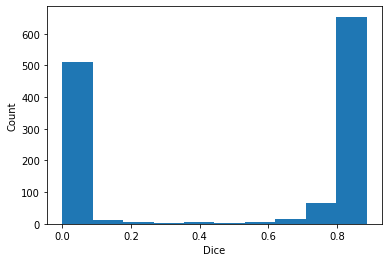

In [4]:
#Dice distribution
import matplotlib.pyplot as plt

# plotting labelled histogram
plt.hist(dice_list)
plt.xlabel('Dice')
plt.ylabel('Count')
plt.show()

In [5]:
import json
print(dice_dict)
with open("Dice.json", "w") as outfile:
    json.dump(dice_dict, outfile, indent=4)

{'sub-6852929_ses-NAPFU24_run-002_T1w.nii.gz': {'FSL-FreeSurfer': 0.0}, 'sub-9931234_ses-NAPBL00_run-001_T1w.nii.gz': {'FSL-FreeSurfer': 0.8230395558639834}, 'sub-9939055_ses-NAPFU12_run-001_T1w.nii.gz': {'FSL-FreeSurfer': 0.8317954126021618}, 'sub-9023102_ses-NAPFU48_run-002_T1w.nii.gz': {'FSL-FreeSurfer': 0.0}, 'sub-9249727_ses-NAPFU24_run-001_T1w.nii.gz': {'FSL-FreeSurfer': 0.771155468091088}, 'sub-2663318_ses-NAPFU24_run-002_T1w.nii.gz': {'FSL-FreeSurfer': 0.8476968796433878}, 'sub-9023102_ses-NAPEN00_run-002_T1w.nii.gz': {'FSL-FreeSurfer': 0.8619967419129625}, 'sub-4541749_ses-NAPFU48_run-001_T1w.nii.gz': {'FSL-FreeSurfer': 0.8515723270440252}, 'sub-4317780_ses-PREFU24_run-001_T1w.nii.gz': {'FSL-FreeSurfer': 0.19406631762652704}, 'sub-3169275_ses-PREFU12_run-001_T1w.nii.gz': {'FSL-FreeSurfer': 0.0}, 'sub-7492583_ses-NAPFU03_run-001_T1w.nii.gz': {'FSL-FreeSurfer': 0.8437853107344633}, 'sub-6350639_ses-NAPFU48_run-002_T1w.nii.gz': {'FSL-FreeSurfer': 0.0}, 'sub-2623146_ses-PREBL00_ru

In [ ]:
#Renaming FreeSurfer files because the '.tar.gz.mgz' was confusing nilearn

#directory2 = '/home/jacob/Desktop/Dice_Ducky/nativeSegs/'

#for old_name in os.listdir(directory2):
#    new_name = old_name.replace(".tar.gz", "")
#    print(new_name)
#    os.rename(directory2+old_name, directory2+new_name)